In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:
bowl = pd.read_csv(r'C:/Users/PYTHON/InternSavy-Projects/Task 3/data/ball.csv')
bat = pd.read_csv(r'C:/Users/PYTHON/InternSavy-Projects/Task 3/data/bat.csv')
match = pd.read_csv(r'C:/Users/PYTHON/InternSavy-Projects/Task 3/data/match.csv')

In [3]:
bowl.head()

,Unnamed: 0,name_x,playing_role,id,order,run_conceded,maidens,wickets,overs,economy,...,matchtype,series_id,match_detail_id,title,runs,over,run_rate,match_id,opp_team_id,team_id
0,8526,Ajit Agarkar,BOWL,8544,2,51,0,2,10.0,5.10,...,odi,182,773,Bangladesh Innings,234,50.0,4.68,633,2,7
1,8518,Tapash Baisya,NaN,8536,0,67,0,2,10.0,6.70,...,odi,182,773,India Innings,245,50.0,4.90,633,7,2
2,8519,Mushfiqur Rahman,NaN,8537,1,29,0,1,6.0,4.83,...,odi,182,773,India Innings,245,50.0,4.90,633,7,2
3,8520,Nazmul Hossain,BOWL,8538,2,39,1,2,9.0,4.33,...,odi,182,773,India Innings,245,50.0,4.90,633,7,2
4,8521,Khaled Mahmud,NaN,8539,3,43,0,1,10.0,4.30,...,odi,182,773,India Innings,245,50.0,4.90,633,7,2


In [4]:
bat.head()

,Unnamed: 0,name_x,playing_role,id,order,runs_x,balls,strike_rate,fours,sixes,...,matchtype,series_id,match_detail_id,title,runs_y,over,run_rate,match_id,opp_team_id,team_id
0,13463,Tapash Baisya,NaN,13464,9,7,5,140.00,1,0,...,odi,182,773,Bangladesh Innings,234,50.0,4.68,633,2,7
1,13462,Khaled Mahmud,NaN,13463,8,21,17,123.52,3,0,...,odi,182,773,Bangladesh Innings,234,50.0,4.68,633,2,7
2,13459,Rajin Saleh,NaN,13460,5,14,28,50.00,1,0,...,odi,182,773,Bangladesh Innings,234,50.0,4.68,633,2,7
3,13461,Mushfiqur Rahman,NaN,13462,7,2,6,33.33,0,0,...,odi,182,773,Bangladesh Innings,234,50.0,4.68,633,2,7
4,13458,Aftab Ahmed,NaN,13459,4,30,49,61.22,2,1,...,odi,182,773,Bangladesh Innings,234,50.0,4.68,633,2,7


In [5]:
match.head()

,Unnamed: 0,match_number,name,start_date,matchtype,series_id,match_detail_id,scorecard_id,title,runs,over,run_rate,match_id,opp_team_id,team_id
0,1417,1.0,Bangladesh v India,2004-12-22 18:30:00+00:00,odi,182,773,1495,India Innings,245,50.0,4.90,633,7,2
1,1418,1.0,Bangladesh v India,2004-12-22 18:30:00+00:00,odi,182,773,1496,Bangladesh Innings,234,50.0,4.68,633,2,7
2,1419,2.0,Bangladesh v India,2004-12-25 18:30:00+00:00,odi,182,774,1497,Bangladesh Innings,229,50.0,4.58,634,2,7
3,1420,2.0,Bangladesh v India,2004-12-25 18:30:00+00:00,odi,182,774,1498,India Innings,214,47.5,4.47,634,7,2
4,1421,3.0,Bangladesh v India,2004-12-26 18:30:00+00:00,odi,182,775,1499,India Innings,348,50.0,6.96,635,7,2


## Data Wrangling
**Bowling**

In [6]:
bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36149 entries, 0 to 36148
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       36149 non-null  int64  
 1   name_x           36149 non-null  object 
 2   playing_role     34892 non-null  object 
 3   id               36149 non-null  int64  
 4   order            36149 non-null  int64  
 5   run_conceded     36149 non-null  int64  
 6   maidens          36149 non-null  int64  
 7   wickets          36149 non-null  int64  
 8   overs            36149 non-null  float64
 9   economy          36149 non-null  float64
 10  wides            36149 non-null  int64  
 11  no_balls         36149 non-null  int64  
 12  fours            15 non-null     float64
 13  sixes            15 non-null     float64
 14  zeros            15 non-null     float64
 15  player_id        36149 non-null  int64  
 16  scorecard_id     36149 non-null  int64  
 17  match_number

In [7]:
bowl.isnull().sum()

Unnamed: 0             0
name_x                 0
playing_role        1257
id                     0
order                  0
run_conceded           0
maidens                0
wickets                0
overs                  0
economy                0
wides                  0
no_balls               0
fours              36134
sixes              36134
zeros              36134
player_id              0
scorecard_id           0
match_number         436
name_y                12
start_date             0
matchtype             16
series_id              0
match_detail_id        0
title                  0
runs                   0
over                   0
run_rate               0
match_id               0
opp_team_id            0
team_id                0
dtype: int64

In [8]:
columns_to_drop = ['playing_role', 'fours', 'sixes', 'zeros']
bowl.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
bowl.describe()

,Unnamed: 0,id,order,run_conceded,maidens,wickets,overs,economy,wides,no_balls,...,scorecard_id,match_number,series_id,match_detail_id,runs,over,run_rate,match_id,opp_team_id,team_id
count,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,...,36149.000000,35713.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000,36149.000000
mean,18074.000000,18079.336081,2.479986,34.009212,0.648151,1.090680,6.706423,6.566942,0.666242,0.164403,...,3101.895626,11.402654,238.073225,2654.181222,206.318183,39.219046,6.466686,1431.561869,14.062132,14.072699
std,10435.461777,10441.536156,1.758716,21.814664,1.770139,1.195191,6.753449,3.202527,1.037237,0.644774,...,1778.116416,15.993555,133.515174,1184.481005,93.391823,31.303129,2.250076,848.092414,12.548100,12.520938
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,416.000000,2.000000,0.200000,0.990000,1.000000,1.000000,1.000000
25%,9037.000000,9038.000000,1.000000,20.000000,0.000000,0.000000,3.000000,4.250000,0.000000,0.000000,...,1575.000000,1.000000,153.000000,1733.000000,148.000000,20.000000,4.710000,671.000000,3.000000,3.000000
50%,18074.000000,18075.000000,2.000000,30.000000,0.000000,1.000000,4.000000,6.000000,0.000000,0.000000,...,3091.000000,3.000000,235.000000,2489.000000,179.000000,20.000000,6.500000,1442.000000,8.000000,8.000000
75%,27111.000000,27112.000000,4.000000,42.000000,0.000000,2.000000,9.000000,8.330000,1.000000,0.000000,...,4640.000000,17.000000,294.000000,3581.000000,248.000000,50.000000,8.200000,2175.000000,25.000000,25.000000
max,36148.000000,36265.000000,8.000000,246.000000,33.000000,9.000000,77.000000,36.000000,13.000000,13.000000,...,6248.000000,72.000000,507.000000,4840.000000,760.000000,225.200000,18.000000,3017.000000,43.000000,43.000000


In [10]:
bowl.isnull().sum()

Unnamed: 0           0
name_x               0
id                   0
order                0
run_conceded         0
maidens              0
wickets              0
overs                0
economy              0
wides                0
no_balls             0
player_id            0
scorecard_id         0
match_number       436
name_y              12
start_date           0
matchtype           16
series_id            0
match_detail_id      0
title                0
runs                 0
over                 0
run_rate             0
match_id             0
opp_team_id          0
team_id              0
dtype: int64

In [11]:
bowl.shape

(36149, 26)

In [12]:
missing_percentage = (bowl.isnull().mean() * 100).round(2)
print(missing_percentage)

Unnamed: 0         0.00
name_x             0.00
id                 0.00
order              0.00
run_conceded       0.00
maidens            0.00
wickets            0.00
overs              0.00
economy            0.00
wides              0.00
no_balls           0.00
player_id          0.00
scorecard_id       0.00
match_number       1.21
name_y             0.03
start_date         0.00
matchtype          0.04
series_id          0.00
match_detail_id    0.00
title              0.00
runs               0.00
over               0.00
run_rate           0.00
match_id           0.00
opp_team_id        0.00
team_id            0.00
dtype: float64


In [13]:
bowl.dropna(axis=1, inplace=True)

In [14]:
# Checking for duplicates
duplicates = bowl.duplicated()
print(bowl[duplicates])

Empty DataFrame
Columns: [Unnamed: 0, name_x, id, order, run_conceded, maidens, wickets, overs, economy, wides, no_balls, player_id, scorecard_id, start_date, series_id, match_detail_id, title, runs, over, run_rate, match_id, opp_team_id, team_id]
Index: []

[0 rows x 23 columns]


**Batsmen**

In [15]:
bat.shape

(52492, 28)

In [16]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52492 entries, 0 to 52491
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52492 non-null  int64  
 1   name_x               52492 non-null  object 
 2   playing_role         50949 non-null  object 
 3   id                   52492 non-null  int64  
 4   order                52492 non-null  int64  
 5   runs_x               52492 non-null  int64  
 6   balls                52492 non-null  int64  
 7   strike_rate          52492 non-null  float64
 8   fours                52492 non-null  int64  
 9   sixes                52492 non-null  int64  
 10  how_out              52483 non-null  object 
 11  fall_of_wicket       44 non-null     float64
 12  fall_of_wicket_over  52492 non-null  float64
 13  player_id            52492 non-null  int64  
 14  scorecard_id         52492 non-null  int64  
 15  match_number         51857 non-null 

In [17]:
missing_percentage = (bat.isnull().mean() * 100).round(2)
print(missing_percentage)

Unnamed: 0              0.00
name_x                  0.00
playing_role            2.94
id                      0.00
order                   0.00
runs_x                  0.00
balls                   0.00
strike_rate             0.00
fours                   0.00
sixes                   0.00
how_out                 0.02
fall_of_wicket         99.92
fall_of_wicket_over     0.00
player_id               0.00
scorecard_id            0.00
match_number            1.21
name_y                  0.02
start_date              0.00
matchtype               0.07
series_id               0.00
match_detail_id         0.00
title                   0.00
runs_y                  0.00
over                    0.00
run_rate                0.00
match_id                0.00
opp_team_id             0.00
team_id                 0.00
dtype: float64


In [18]:
columns_to_drop = ['fall_of_wicket', 'fall_of_wicket_over']
bat.drop(columns_to_drop, axis=1, inplace=True)

In [19]:
bat.dropna(axis=1, inplace=True)

In [20]:
bat.shape

(52492, 21)

**Match**

In [21]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6199 non-null   int64  
 1   match_number     6124 non-null   float64
 2   name             6197 non-null   object 
 3   start_date       6199 non-null   object 
 4   matchtype        6195 non-null   object 
 5   series_id        6199 non-null   int64  
 6   match_detail_id  6199 non-null   int64  
 7   scorecard_id     6199 non-null   int64  
 8   title            6199 non-null   object 
 9   runs             6199 non-null   int64  
 10  over             6199 non-null   float64
 11  run_rate         6199 non-null   float64
 12  match_id         6199 non-null   int64  
 13  opp_team_id      6199 non-null   int64  
 14  team_id          6199 non-null   int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 726.6+ KB


In [22]:
missing_percentage = (match.isnull().mean() * 100).round(2)
print(missing_percentage)

Unnamed: 0         0.00
match_number       1.21
name               0.03
start_date         0.00
matchtype          0.06
series_id          0.00
match_detail_id    0.00
scorecard_id       0.00
title              0.00
runs               0.00
over               0.00
run_rate           0.00
match_id           0.00
opp_team_id        0.00
team_id            0.00
dtype: float64


In [23]:
match.dropna(axis=1, inplace=True)

**Dimensions of The whole Dataset**

In [24]:
df=[bowl, bat, match]

In [25]:
def dimensions(df):
    for i in df:
        print(i.shape)
        print('*'*100)
        print(i.info())
        print('*'*100)
        print(i.isna().sum())

In [26]:
dimensions(df)

(36149, 23)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36149 entries, 0 to 36148
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       36149 non-null  int64  
 1   name_x           36149 non-null  object 
 2   id               36149 non-null  int64  
 3   order            36149 non-null  int64  
 4   run_conceded     36149 non-null  int64  
 5   maidens          36149 non-null  int64  
 6   wickets          36149 non-null  int64  
 7   overs            36149 non-null  float64
 8   economy          36149 non-null  float64
 9   wides            36149 non-null  int64  
 10  no_balls         36149 non-null  int64  
 11  player_id        36149 non-null  int64  
 12  scorecard_id     36149 non-null  int64  
 13  start_date       36149 non-null  object 
 14  series_id        36149 non-null  int6

In [27]:
def remove_duplicates(df):
    for i in df:
        i.drop_duplicates(inplace=True)
        print(i.shape)
        print('*'*100)

In [28]:
remove_duplicates(df)

(36149, 23)
****************************************************************************************************
(52492, 21)
****************************************************************************************************
(6199, 12)
****************************************************************************************************


### Statistical Summary

In [29]:
def stat_summary(df):
    for i in df:
        print(i.describe(include='all'))
        print('*'*100)

In [30]:
stat_summary(df)

          Unnamed: 0           name_x            id         order  \
count   36149.000000            36149  36149.000000  36149.000000   
unique           NaN             1183           NaN           NaN   
top              NaN  Ravindra Jadeja           NaN           NaN   
freq             NaN              458           NaN           NaN   
mean    18074.000000              NaN  18079.336081      2.479986   
std     10435.461777              NaN  10441.536156      1.758716   
min         0.000000              NaN      1.000000      0.000000   
25%      9037.000000              NaN   9038.000000      1.000000   
50%     18074.000000              NaN  18075.000000      2.000000   
75%     27111.000000              NaN  27112.000000      4.000000   
max     36148.000000              NaN  36265.000000      8.000000   

        run_conceded       maidens       wickets         overs       economy  \
count   36149.000000  36149.000000  36149.000000  36149.000000  36149.000000   
unique     

In [31]:
# let's separate our date into day, month, and year
def separate_date(df):
    for i in range(len(df)):
        if 'start_date' in df[i].columns:
            df[i]['Year']=pd.to_datetime(df[i]['start_date'])
            df[i]['Month']=df[i]['Year'].apply(lambda x:x.month) # Extracting Month
            df[i]['Day']=df[i]['Year'].apply(lambda x:x.day) # Extracting day
            df[i]['year']=df[i]['Year'].apply(lambda x:x.year) # Extracting year
            print(df[i].head())
            print("---------------------------")
        else:
            print("DataFrame", i, "does not have 'start_date' column")
            print("---------------------------")

In [32]:
separate_date(df)

   Unnamed: 0            name_x    id  order  run_conceded  maidens  wickets  \
0        8526      Ajit Agarkar  8544      2            51        0        2   
1        8518     Tapash Baisya  8536      0            67        0        2   
2        8519  Mushfiqur Rahman  8537      1            29        0        1   
3        8520    Nazmul Hossain  8538      2            39        1        2   
4        8521     Khaled Mahmud  8539      3            43        0        1   

   overs  economy  wides  ...  runs  over  run_rate match_id  opp_team_id  \
0   10.0     5.10      3  ...   234  50.0      4.68      633            2   
1   10.0     6.70      3  ...   245  50.0      4.90      633            7   
2    6.0     4.83      1  ...   245  50.0      4.90      633            7   
3    9.0     4.33      3  ...   245  50.0      4.90      633            7   
4   10.0     4.30      2  ...   245  50.0      4.90      633            7   

   team_id                      Year  Month  Day  year  

In [33]:
# Let's drop the remaining irrelevant columns
def drop_irrelevant(df):
    for i in range(len(df)):
        columns_to_drop = ['Unnamed: 0', 'start_date', 'Year']
        irrelevant_columns = [col for col in columns_to_drop if col in df[i].columns]
        
        if irrelevant_columns:
            df[i].drop(columns=irrelevant_columns, axis=1, inplace=True)
            print("DataFrame", i, "after dropping irrelevant columns:")
            print("Dataframe", i, "does not have any irrelevant columns")
            print("-------------------------")

In [34]:
drop_irrelevant(df)

DataFrame 0 after dropping irrelevant columns:
Dataframe 0 does not have any irrelevant columns
-------------------------
DataFrame 1 after dropping irrelevant columns:
Dataframe 1 does not have any irrelevant columns
-------------------------
DataFrame 2 after dropping irrelevant columns:
Dataframe 2 does not have any irrelevant columns
-------------------------


In [35]:
bowl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36149 entries, 0 to 36148
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name_x           36149 non-null  object 
 1   id               36149 non-null  int64  
 2   order            36149 non-null  int64  
 3   run_conceded     36149 non-null  int64  
 4   maidens          36149 non-null  int64  
 5   wickets          36149 non-null  int64  
 6   overs            36149 non-null  float64
 7   economy          36149 non-null  float64
 8   wides            36149 non-null  int64  
 9   no_balls         36149 non-null  int64  
 10  player_id        36149 non-null  int64  
 11  scorecard_id     36149 non-null  int64  
 12  series_id        36149 non-null  int64  
 13  match_detail_id  36149 non-null  int64  
 14  title            36149 non-null  object 
 15  runs             36149 non-null  int64  
 16  over             36149 non-null  float64
 17  run_rate    

In [36]:
bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52492 entries, 0 to 52491
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name_x           52492 non-null  object 
 1   id               52492 non-null  int64  
 2   order            52492 non-null  int64  
 3   runs_x           52492 non-null  int64  
 4   balls            52492 non-null  int64  
 5   strike_rate      52492 non-null  float64
 6   fours            52492 non-null  int64  
 7   sixes            52492 non-null  int64  
 8   player_id        52492 non-null  int64  
 9   scorecard_id     52492 non-null  int64  
 10  series_id        52492 non-null  int64  
 11  match_detail_id  52492 non-null  int64  
 12  title            52492 non-null  object 
 13  runs_y           52492 non-null  int64  
 14  over             52492 non-null  float64
 15  run_rate         52492 non-null  float64
 16  match_id         52492 non-null  int64  
 17  opp_team_id 

In [37]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   series_id        6199 non-null   int64  
 1   match_detail_id  6199 non-null   int64  
 2   scorecard_id     6199 non-null   int64  
 3   title            6199 non-null   object 
 4   runs             6199 non-null   int64  
 5   over             6199 non-null   float64
 6   run_rate         6199 non-null   float64
 7   match_id         6199 non-null   int64  
 8   opp_team_id      6199 non-null   int64  
 9   team_id          6199 non-null   int64  
 10  Month            6199 non-null   int32  
 11  Day              6199 non-null   int32  
 12  year             6199 non-null   int32  
dtypes: float64(2), int32(3), int64(7), object(1)
memory usage: 557.1+ KB


In [38]:
df_list = [bowl,bat,match]

In [39]:
# Let's separate object type data, and numerical data and encode the to numeric form
from sklearn.preprocessing import LabelEncoder

numerics = ['int68', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']

def get_categorical_columns(df_list):
    cat_col_list = [] # List to store categorical colum names for each DataFrame
    
    for df in df_list:
        cat_col = [] # List to store categorical column names for the current DataFrame
        features = df.columns.values.tolist()
        
        for col in features:
            if df[col].dtype not in numerics: # Check if the column's data type is non-numeric
                cat_col.append(col)
                
        cat_col_list.append(cat_col)
        
    return cat_col_list

def label_encode_categorical_columns(df_list):
    label = LabelEncoder()
    
    categorical_columns_list = get_categorical_columns(df_list)
    
    for i, cat_col in enumerate(categorical_columns_list):
        for col in cat_col:
            encoded_values = label.fit_transform(df_list[i][col])
            df_list[i][col] = encoded_values

In [40]:
label_encode_categorical_columns(df_list)

In [41]:
bat.head(3)

,name_x,id,order,runs_x,balls,strike_rate,fours,sixes,player_id,scorecard_id,...,title,runs_y,over,run_rate,match_id,opp_team_id,team_id,Month,Day,year
0,1410,13464,9,7,5,140.00,1,0,850,1496,...,9,234,50.0,4.68,633,2,7,12,22,2004
1,729,13463,8,21,17,123.52,3,0,849,1496,...,9,234,50.0,4.68,633,2,7,12,22,2004
2,1123,13460,5,14,28,50.00,1,0,821,1496,...,9,234,50.0,4.68,633,2,7,12,22,2004


In [42]:
bowl.head(3)

,name_x,id,order,run_conceded,maidens,wickets,overs,economy,wides,no_balls,...,title,runs,over,run_rate,match_id,opp_team_id,team_id,Month,Day,year
0,48,8544,2,51,0,2,10.0,5.10,3,3,...,9,234,50.0,4.68,633,2,7,12,22,2004
1,1066,8536,0,67,0,2,10.0,6.70,3,0,...,27,245,50.0,4.90,633,7,2,12,22,2004
2,741,8537,1,29,0,1,6.0,4.83,1,0,...,27,245,50.0,4.90,633,7,2,12,22,2004


In [43]:
match.head()

,series_id,match_detail_id,scorecard_id,title,runs,over,run_rate,match_id,opp_team_id,team_id,Month,Day,year
0,182,773,1495,27,245,50.0,4.90,633,7,2,12,22,2004
1,182,773,1496,9,234,50.0,4.68,633,2,7,12,22,2004
2,182,774,1497,9,229,50.0,4.58,634,2,7,12,25,2004
3,182,774,1498,27,214,47.5,4.47,634,7,2,12,25,2004
4,182,775,1499,27,348,50.0,6.96,635,7,2,12,26,2004


### Data Integration and Merging

if we merge our datasets based on inner, we will have zero rows since batsman and bowlers are different, we will feature engineer and predict them separately

In [72]:
# Convert columns to a consistent data type
bat['match_id'] = bat['match_id'].astype(int)
bowl['match_id'] = bowl['match_id'].astype(int)

bat['player_id'] = bat['player_id'].astype(int)
bowl['player_id'] = bowl['player_id'].astype(int)

bat['Day'] = bat['Day'].astype(int)
bowl['Day'] = bowl['Day'].astype(int)

# Merge the DataFrames after ensuring columns have the same data types
batsman_join_bowler = pd.merge(bat, bowl, on=['match_id', 'player_id', 'Day','Month','year'], how='inner')
batsman_join_bowler

,name_x_x,id_x,order_x,runs_x,balls,strike_rate,fours,sixes,player_id,scorecard_id_x,...,no_balls,scorecard_id_y,series_id_y,match_detail_id_y,title_y,runs,over_y,run_rate_y,opp_team_id_y,team_id_y
0,978,36135,7,53,58,91.37,5,1,384,4326,...,0,4327,296,2482,45,264,49.0,5.38,4,9
1,186,2419,5,21,41,51.21,2,0,151,241,...,0,244,24,4348,26,162,54.2,2.98,5,2
2,186,2419,5,21,41,51.21,2,0,151,241,...,1,242,24,4348,25,274,76.0,3.60,5,2
3,186,2441,5,6,13,46.15,0,0,151,243,...,0,244,24,4348,26,162,54.2,2.98,5,2
4,186,2441,5,6,13,46.15,0,0,151,243,...,1,242,24,4348,25,274,76.0,3.60,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26874,1498,5397,10,0,1,0.00,0,0,65,570,...,0,569,57,4511,42,303,50.0,6.06,2,4
26875,1132,31782,7,40,18,222.22,4,3,599,3835,...,1,3834,247,2214,61,168,20.0,8.40,37,36
26876,930,5395,9,14,15,93.33,0,1,28,570,...,0,569,57,4511,42,303,50.0,6.06,2,4
26877,1139,5391,6,7,11,63.63,1,0,64,570,...,0,569,57,4511,42,303,50.0,6.06,2,4


In [47]:
batsman_join_bowler.shape

(26879, 44)

In [70]:
batsman_join_bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26879 entries, 0 to 26878
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name_x_x                   26879 non-null  int32  
 1   id_x                       26879 non-null  int64  
 2   order_x                    26879 non-null  int64  
 3   runs_x                     26879 non-null  int64  
 4   balls                      26879 non-null  int64  
 5   strike_rate                26879 non-null  float64
 6   fours                      26879 non-null  int64  
 7   sixes                      26879 non-null  int64  
 8   player_id                  26879 non-null  int32  
 9   scorecard_id_x             26879 non-null  int64  
 10  series_id_x                26879 non-null  int64  
 11  match_detail_id_x          26879 non-null  int64  
 12  title_x                    26879 non-null  int32  
 13  runs_y                     26879 non-null  int

## Data Preparation for Model Building

Our taget column in Cricket Player Perfomance is the variable we want to predict, since we want to predict player performance, the target column should be a performance metrics that we want to forecast for each player.

Common perfomance metircs for cricket layers should be:
**Batting Average**: The average number of runs scored per innings by a batsman

**Bowling Average**: The average number of runs conceded per wicket taken bya a bwoler

**Strike Rate**(Batting): The number of runs scored per 100 balls faced by a batsman

**Economy Rate**(Bowling): The average number of runs conceded per over by a bowler

**Batting Runs**: The total number of runs scored by a batsman in a series or tournament

**Wickets Taken**: The total number of wickets taken by a bowler in a series or tournament

**Maiden Overs**: The number of overs bowled by a bowler without conceding any runs.

**Catches/Stumpings**: The total number of catches and stumpings taken by a fielder/keeper



So as i want to see the Player Performance Score: I have to create a composite performance score for each player based on different features and use it as the target variable.

**Batting Average**

In [84]:
import pandas as pd


# Sort the DataFrame by Day
batsman_join_bowler = batsman_join_bowler.sort_values(by='Day')

# Calculate cumulative runs for each player over time
batsman_join_bowler['cumulative_runs'] = batsman_join_bowler.groupby('player_id')['runs'].cumsum()

# Calculate cumulative innings for each player over time
batsman_join_bowler['cumulative_innings'] = batsman_join_bowler.groupby('player_id')['balls'].cumcount() + 1

# Calculate batting average for each player over time
batsman_join_bowler['batting_average_over_time'] = batsman_join_bowler['cumulative_runs'] / batsman_join_bowler['cumulative_innings']

# Create a DataFrame with player ID, batting average over time
batting_average2_df = pd.DataFrame({
    'Player_ID': batsman_join_bowler['player_id'],
    'Day': batsman_join_bowler['Day'],
    'Batting_Average2': batsman_join_bowler['batting_average_over_time']
})

print(batting_average2_df)


       Player_ID  Day  Batting_Average2
0            384    1        264.000000
569           78    1        192.000000
570           78    1        310.000000
571           78    1        270.666667
572           66    1        428.000000
...          ...  ...               ...
26600        115   31        210.216418
26599         10   31        203.183486
26598       1332   31        157.666667
26612        156   31        202.273684
26878        381   31        246.111111

[26879 rows x 3 columns]


**Bowling Average**

In [85]:
import pandas as pd


# Sort the DataFrame by date to ensure the data is in chronological order
batsman_join_bowler = batsman_join_bowler.sort_values(by='Day')

# Calculate cumulative runs conceded for each player over time
batsman_join_bowler['cumulative_runs_conceded'] = batsman_join_bowler.groupby('player_id')['run_conceded'].cumsum()

# Calculate cumulative wickets taken for each player over time
batsman_join_bowler['cumulative_wickets'] = batsman_join_bowler.groupby('player_id')['wickets'].cumsum()

# Handling division by zero (if a player hasn't taken any wickets)
batsman_join_bowler.loc[batsman_join_bowler['cumulative_wickets'] == 0, 'bowling_average_over_time'] = 0
non_zero_wickets = batsman_join_bowler['cumulative_wickets'] != 0

# Calculate bowling average for each player over time
batsman_join_bowler.loc[non_zero_wickets, 'bowling_average_over_time'] = (
    batsman_join_bowler['cumulative_runs_conceded'] / batsman_join_bowler['cumulative_wickets']
)

# Create a DataFrame with player ID, date, and bowling average over time
Bowling_Average2_df = pd.DataFrame({
    'Player_ID': batsman_join_bowler['player_id'],
    'Day': batsman_join_bowler['Day'],
    'Bowling_Average2': batsman_join_bowler['bowling_average_over_time']
})

print(Bowling_Average2_df)


       Player_ID  Day  Bowling_Average2
0            384    1          0.000000
1            151    1         10.000000
2            151    1         18.833333
3            151    1         15.300000
4            151    1         18.833333
...          ...  ...               ...
26874         65   31         51.111111
26875        599   31         23.000000
26876         28   31         29.953416
26861        136   31         26.739300
26878        381   31         44.130435

[26879 rows x 3 columns]


**Step 1: Choose relevant performance metrics**

In [86]:
batting_average1 = batting_average2_df['Batting_Average2']
bowling_average1 = Bowling_Average2_df['Bowling_Average2']
strike_rate_batting = batsman_join_bowler['strike_rate']
economy_rate_bowling = batsman_join_bowler['economy']
maiden_overs = batsman_join_bowler['maidens']

**Step 2: Normalize the selected performance metrics**

You can use Min-Max Scaling or Z-score normalization

In [51]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [88]:
def min_max_scaling(x):
    return(x - x.min()) / (x.max() - x.min())

normalized_batting_average = min_max_scaling(batting_average1)
normalized_bowling_average = min_max_scaling(bowling_average1)
normalized_strike_rate_batting = min_max_scaling(strike_rate_batting)
normalized_economy_rate_bowling = min_max_scaling(economy_rate_bowling)
#normalized_maiden_overs = min_max_scaling(maiden_overs)

# Assign weights
batting_weight = 0.3
bowling_weight = 0.25
strike_rate_weight = 0.2
economy_rate_weight = 0.25
#maiden_overs_weight = 0.35

# Calculate the composite performance score for each player
batsman_join_bowler['Player Performance Score'] = (batting_weight * normalized_batting_average + 
                                                   bowling_weight * normalized_bowling_average + 
                                                   strike_rate_weight * normalized_strike_rate_batting + 
                                                   economy_rate_weight * normalized_economy_rate_bowling
                                                   )

print(batsman_join_bowler[['player_id', 'Player Performance Score']])

       player_id  Player Performance Score
0            384                  0.179556
1            151                  0.119602
2            151                  0.134888
3            151                  0.121593
4            151                  0.133511
...          ...                       ...
26874         65                  0.169710
26875        599                  0.219623
26876         28                  0.187573
26861        136                  0.135162
26878        381                  0.164664

[26879 rows x 2 columns]


In [89]:
batsman_join_bowler.isnull().sum()

name_x_x                     0
id_x                         0
order_x                      0
runs_x                       0
balls                        0
strike_rate                  0
fours                        0
sixes                        0
player_id                    0
scorecard_id_x               0
series_id_x                  0
match_detail_id_x            0
title_x                      0
runs_y                       0
over_x                       0
run_rate_x                   0
match_id                     0
opp_team_id_x                0
team_id_x                    0
Month                        0
Day                          0
year                         0
cumulative_runs              0
cumulative_innings           0
batting_average_over_time    0
name_x_y                     0
id_y                         0
order_y                      0
run_conceded                 0
maidens                      0
wickets                      0
overs                        0
economy 

In [90]:
batsman_join_bowler.columns

Index(['name_x_x', 'id_x', 'order_x', 'runs_x', 'balls', 'strike_rate',
       'fours', 'sixes', 'player_id', 'scorecard_id_x', 'series_id_x',
       'match_detail_id_x', 'title_x', 'runs_y', 'over_x', 'run_rate_x',
       'match_id', 'opp_team_id_x', 'team_id_x', 'Month', 'Day', 'year',
       'cumulative_runs', 'cumulative_innings', 'batting_average_over_time',
       'name_x_y', 'id_y', 'order_y', 'run_conceded', 'maidens', 'wickets',
       'overs', 'economy', 'wides', 'no_balls', 'scorecard_id_y',
       'series_id_y', 'match_detail_id_y', 'title_y', 'runs', 'over_y',
       'run_rate_y', 'opp_team_id_y', 'team_id_y', 'cumulative_runs_conceded',
       'cumulative_wickets', 'bowling_average_over_time',
       'Player Performance Score'],
      dtype='object')

### Feature Engineering

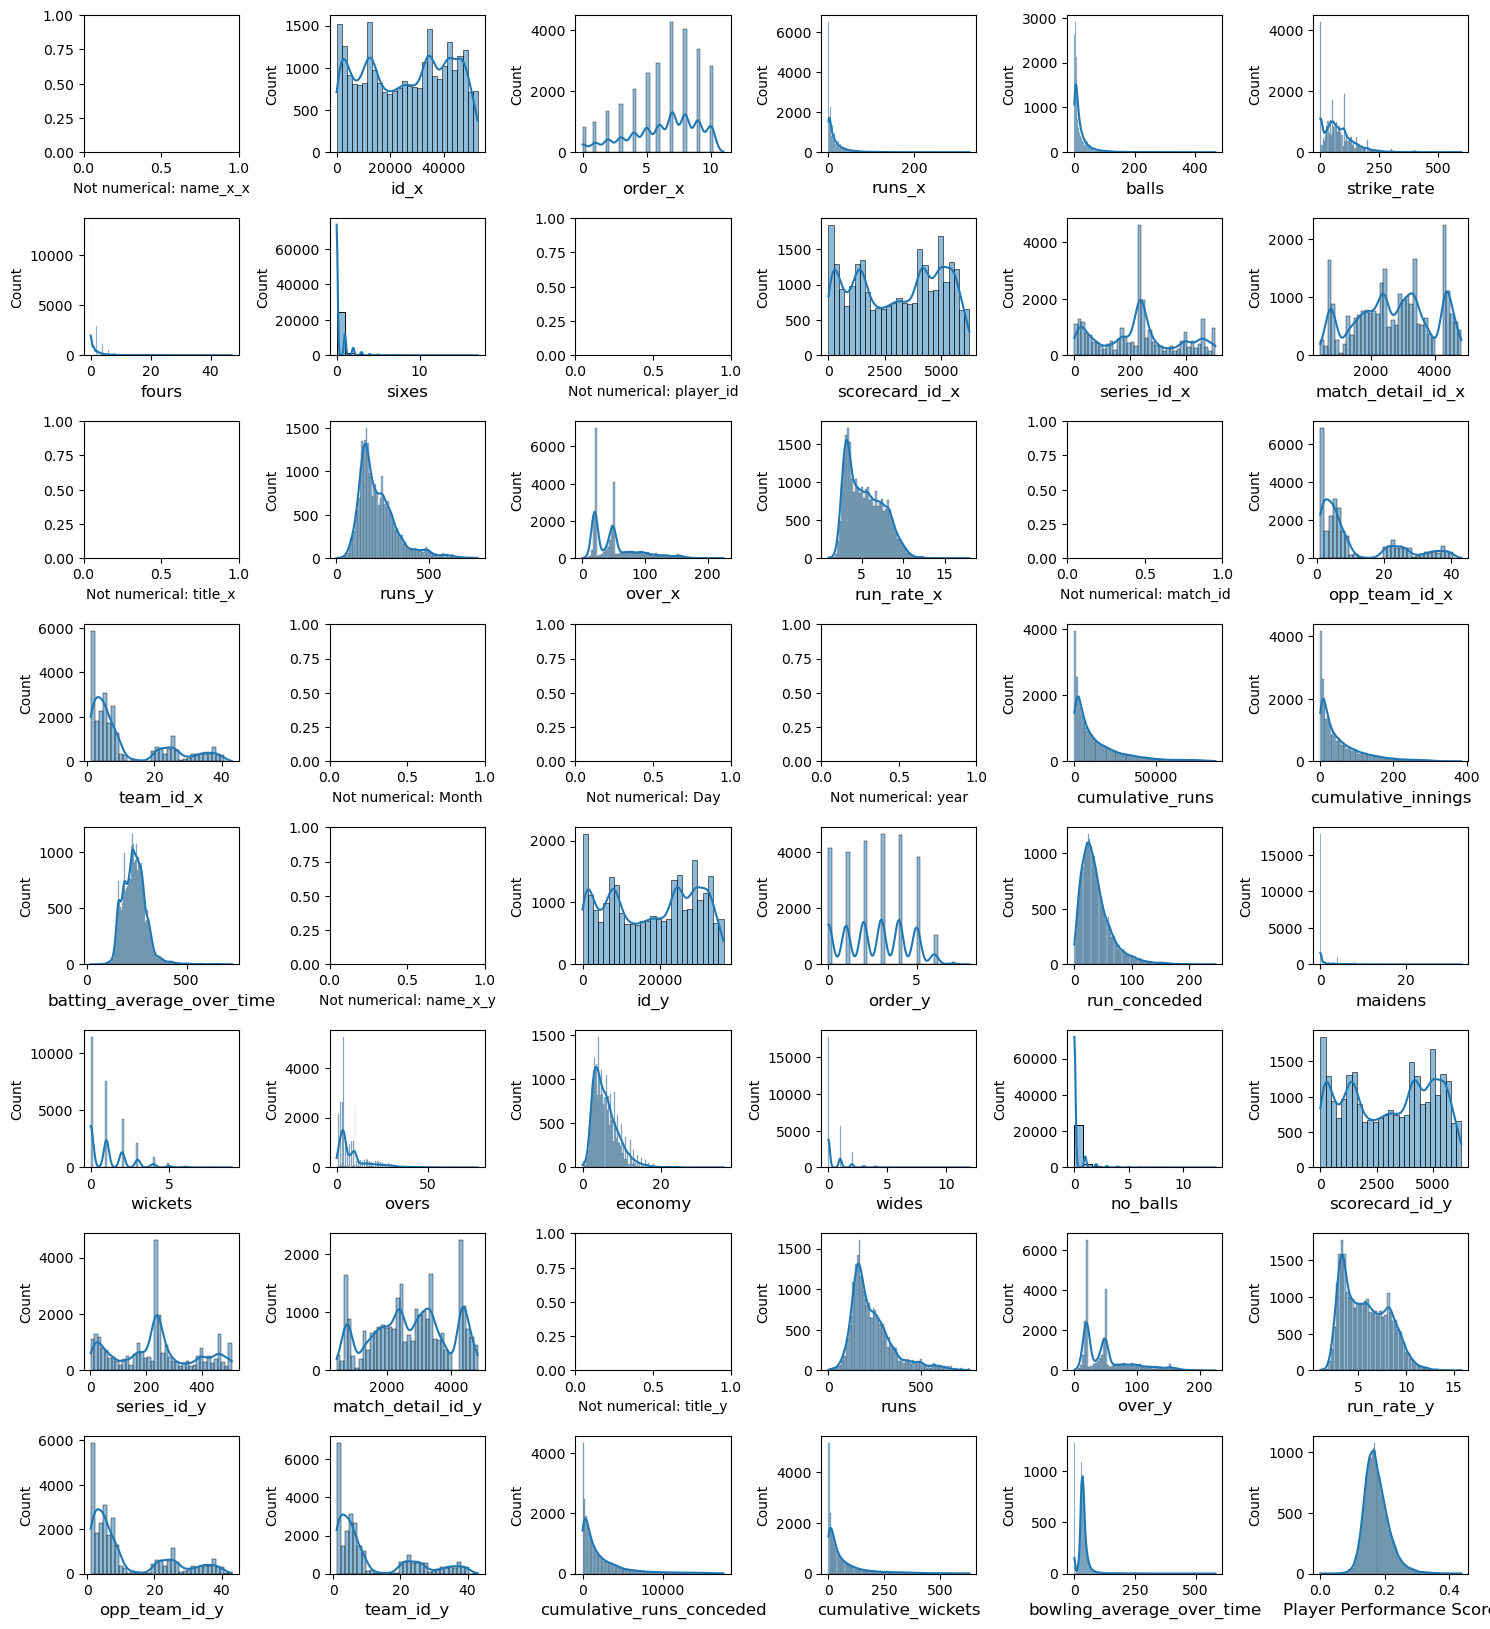

In [92]:
# Let's see how our data is distributed
plt.figure(figsize=(15, 20))
plotnumber=1
for column in batsman_join_bowler.columns:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        
        # check if the column is numerical
        if batsman_join_bowler[column].dtype in ['int64', 'float64']:
            sns.histplot(batsman_join_bowler[column], kde=True)
            plt.xlabel(column, fontsize=12)
        else:
            plt.xlabel(f"Not numerical: {column}", fontsize=10)
            
    plotnumber+=1
plt.tight_layout()
plt.show()

In [93]:
batsman_join_bowler.skew()

name_x_x                    -0.010396
id_x                        -0.065321
order_x                     -0.556675
runs_x                       3.325546
balls                        4.176840
strike_rate                  1.601957
fours                        3.736380
sixes                        4.071115
player_id                    1.578275
scorecard_id_x              -0.086324
series_id_x                  0.184183
match_detail_id_x           -0.085984
title_x                      0.011092
runs_y                       1.455763
over_x                       1.333995
run_rate_x                   0.509511
match_id                    -0.095159
opp_team_id_x                1.182764
team_id_x                    1.145812
Month                        0.209420
Day                         -0.033671
year                        -0.295189
cumulative_runs              1.856353
cumulative_innings           1.759661
batting_average_over_time    1.240498
name_x_y                    -0.026926
id_y        

A skewness value close to 0 (between -0.5 and 0.5) indicates that the data has a roughly symmetric distribution. The tail of the distribution is approximately balanced, and the data is evenly distributed around the mean. In this case, the data is not significantly skewed, and no further action may be required.

In [96]:
skewed_columns = batsman_join_bowler.skew()[(batsman_join_bowler.skew() >= 0.5) | (batsman_join_bowler.skew() <= -0.5)]


In [97]:
len(skewed_columns)

30

In [99]:
from sklearn.preprocessing import PowerTransformer

# Calculate skewness for each column
skewness = batsman_join_bowler.skew()

# Select columns where absolute skewness is greater than 0.5
skewed_columns = skewness[abs(skewness) >= 0.5].index

# Create a copy of the selected columns for transformation
columns_to_transform = batsman_join_bowler[skewed_columns].copy()

# Apply Power Transformation
pt = PowerTransformer()
transformed_values = pt.fit_transform(columns_to_transform)

# Replace the original columns with transformed values
batsman_join_bowler[skewed_columns] = transformed_values


In [100]:
batsman_join_bowler.skew()

name_x_x                    -0.010396
id_x                        -0.065321
order_x                     -0.286720
runs_x                      -0.010249
balls                        0.005868
strike_rate                 -0.238071
fours                        0.298704
sixes                        1.372139
player_id                   -0.039890
scorecard_id_x              -0.086324
series_id_x                  0.184183
match_detail_id_x           -0.085984
title_x                      0.011092
runs_y                       0.002310
over_x                       0.034398
run_rate_x                   0.000017
match_id                    -0.095159
opp_team_id_x                0.087078
team_id_x                    0.067778
Month                        0.209420
Day                         -0.033671
year                        -0.295189
cumulative_runs             -0.063728
cumulative_innings          -0.047117
batting_average_over_time    0.018322
name_x_y                    -0.026926
id_y        

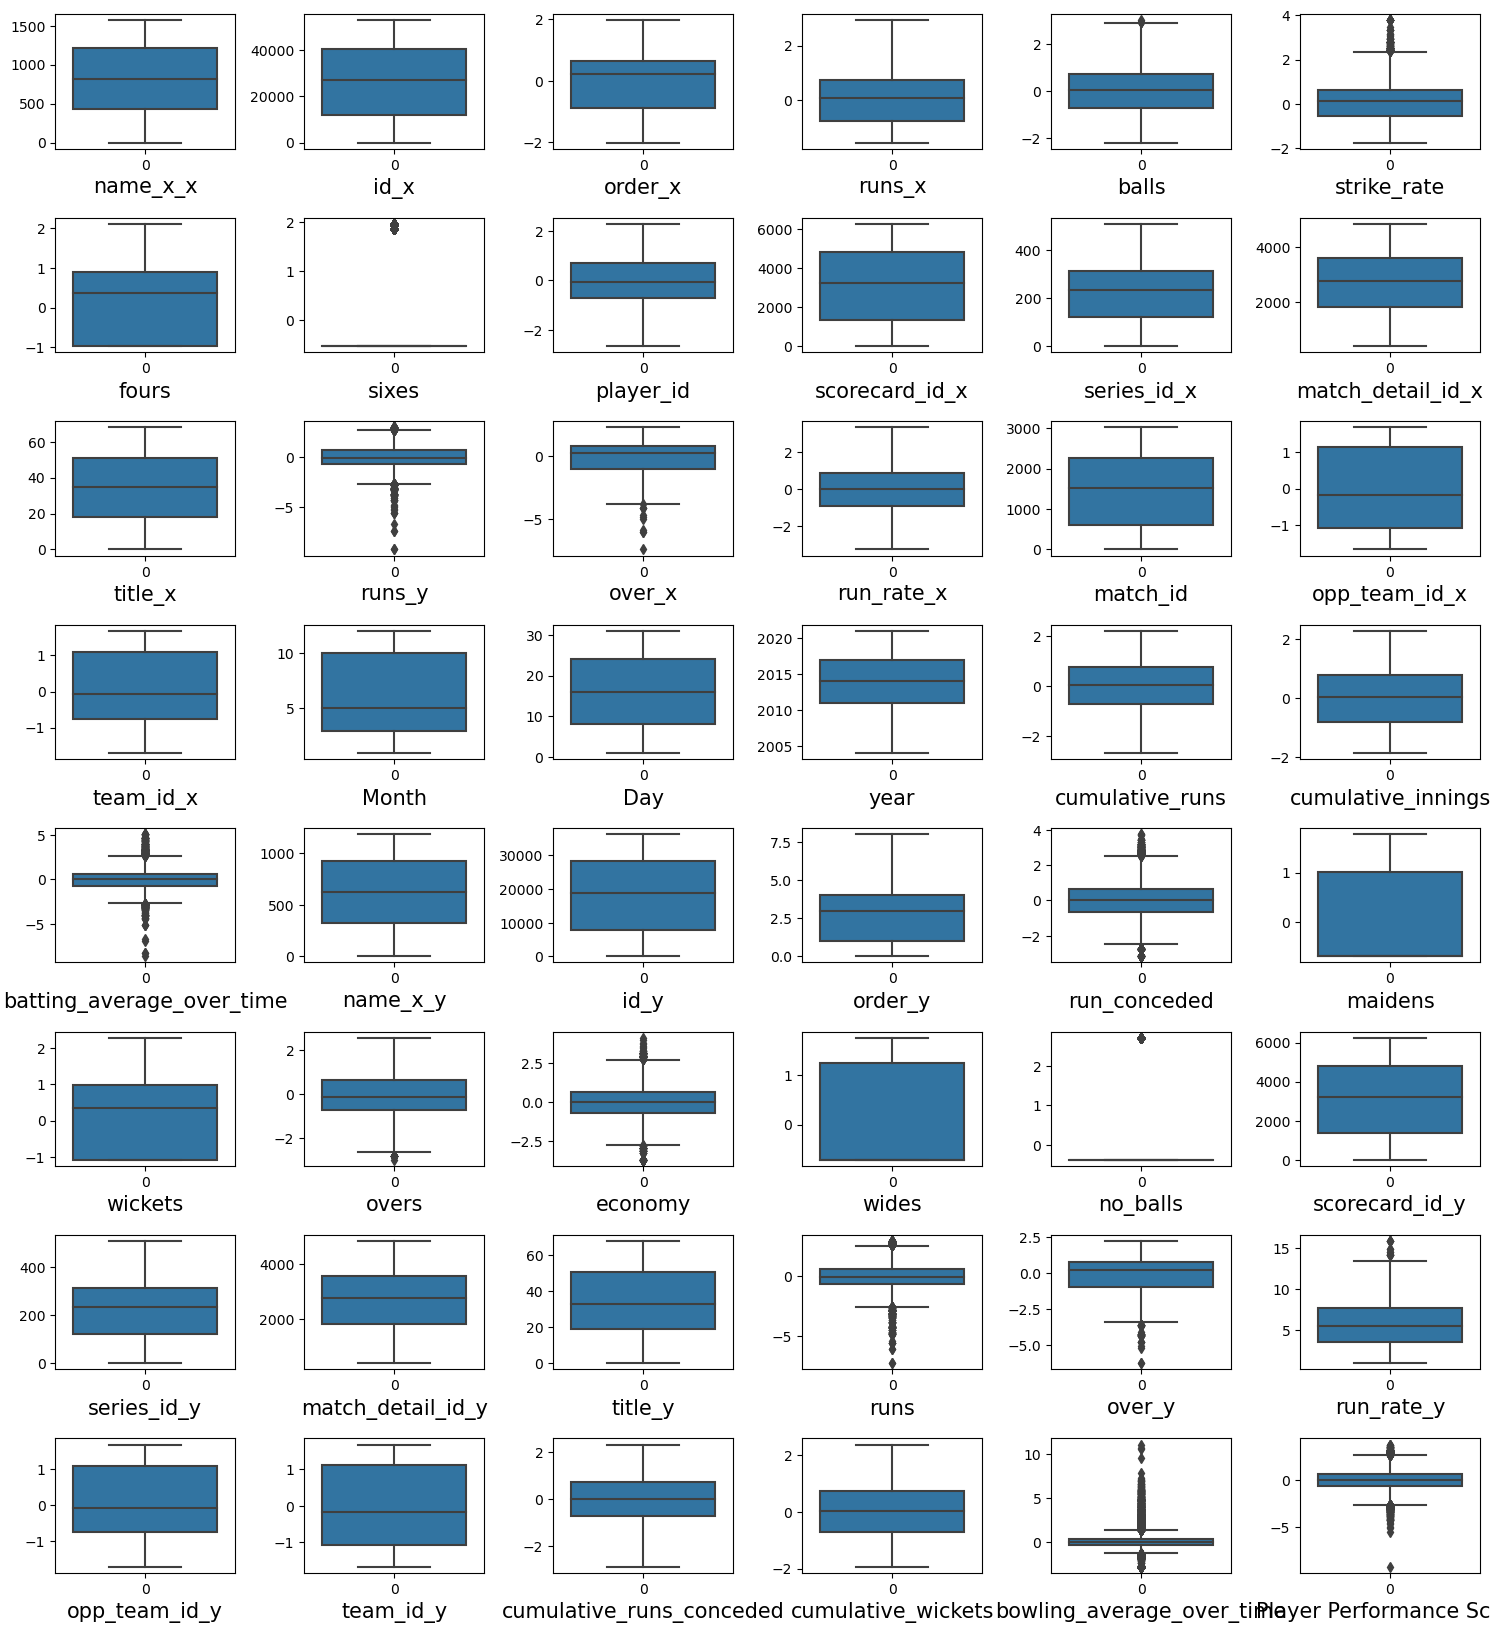

In [101]:
# Let's check for Outliers
plt.figure(figsize=(15, 20))
plotnumber=1
for column in batsman_join_bowler:
    if plotnumber <= 60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(batsman_join_bowler[column])
        plt.xlabel(column, fontsize=15)
    
    plotnumber+=1
    
plt.tight_layout()
plt.show()

In [102]:
outliers_col = ['strike_rate','runs_y','over_x','runs','over_y','run_rate_y','bowling_average_over_time', 'Player Performance Score']

In [103]:
# Remove the outliers by using Z score
from scipy.stats import zscore
z_score=zscore(batsman_join_bowler[outliers_col])
z_score_abs=np.abs(z_score)
filter_entry = (z_score_abs<3).all(axis=1)
batsman_join_bowler=batsman_join_bowler[filter_entry]
batsman_join_bowler.head()

,name_x_x,id_x,order_x,runs_x,balls,strike_rate,fours,sixes,player_id,scorecard_id_x,...,title_y,runs,over_y,run_rate_y,opp_team_id_y,team_id_y,cumulative_runs_conceded,cumulative_wickets,bowling_average_over_time,Player Performance Score
0,978,36135,0.217748,1.459338,1.363480,0.482877,1.458195,1.858057,0.513095,4326,...,45,0.444637,0.304485,5.38,-0.472331,0.382446,-1.899907,-1.931497,-2.814955,0.233645
1,186,2419,-0.552761,0.760627,1.084946,-0.086956,0.885184,-0.526949,-0.337933,241,...,26,-0.598946,0.440635,2.98,-0.253283,-1.070654,-1.736474,-1.107199,-1.544215,-1.729668
2,186,2419,-0.552761,0.760627,1.084946,-0.086956,0.885184,-0.526949,-0.337933,241,...,25,0.526611,0.886695,3.60,-0.253283,-1.070654,-1.288549,-0.917177,-0.898114,-1.153458
3,186,2441,-0.552761,-0.108527,0.161911,-0.174601,-0.966977,-0.526949,-0.337933,243,...,26,-0.598946,0.440635,2.98,-0.253283,-1.070654,-1.142670,-0.651482,-1.135834,-1.651253
4,186,2441,-0.552761,-0.108527,0.161911,-0.174601,-0.966977,-0.526949,-0.337933,243,...,25,0.526611,0.886695,3.60,-0.253283,-1.070654,-0.944101,-0.550154,-0.898114,-1.202991


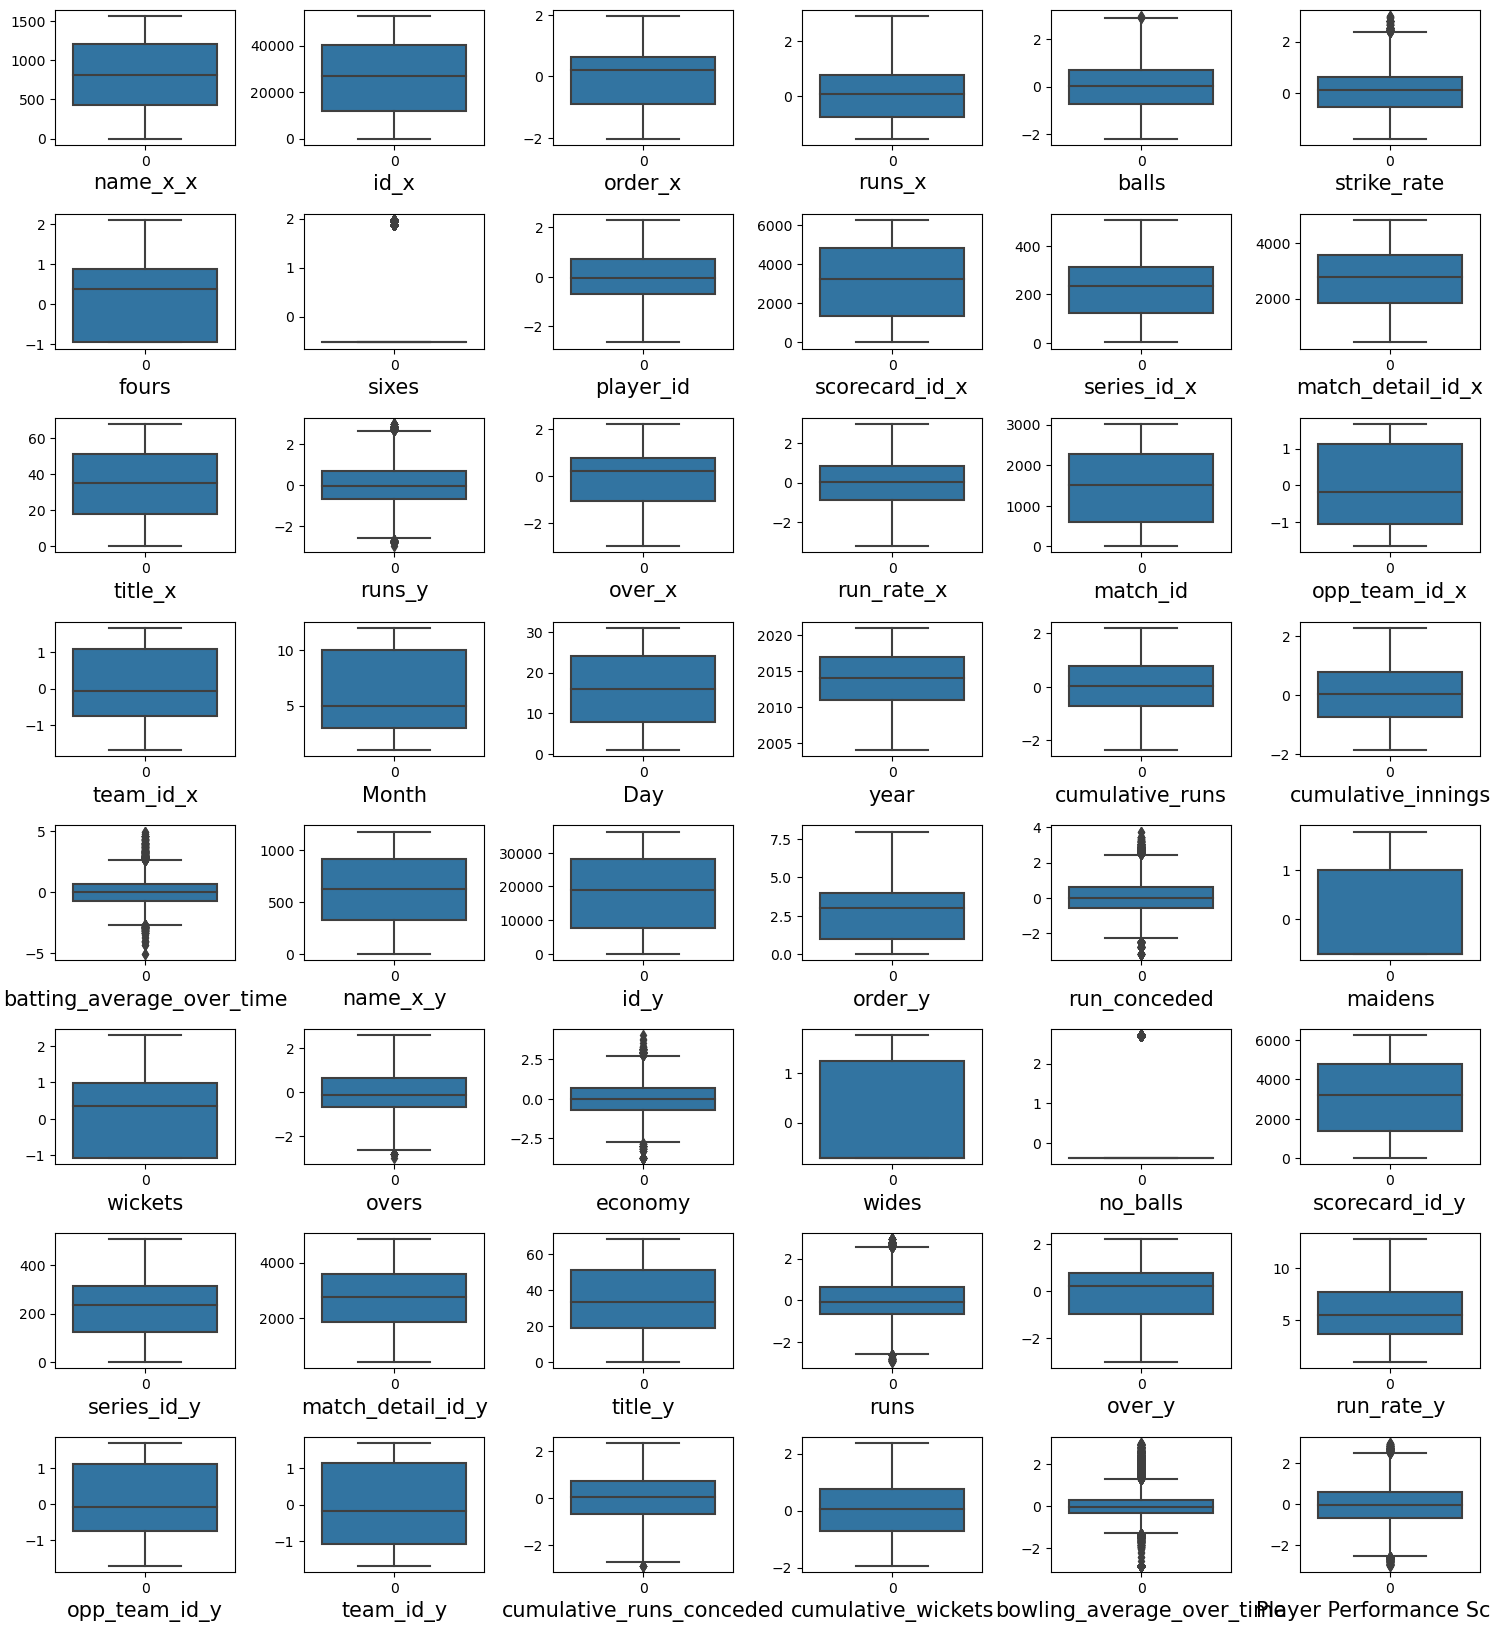

In [104]:
# lets Recheck outliers
# Let's check for Outliers
plt.figure(figsize=(15, 20))
plotnumber=1
for column in batsman_join_bowler:
    if plotnumber <= 60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(batsman_join_bowler[column])
        plt.xlabel(column, fontsize=15)
    
    plotnumber+=1
    
plt.tight_layout()
plt.show()

In [106]:
# Use Player Performance Score as the target variable for the prediction model
X = batsman_join_bowler[['runs_x','overs','runs_y','opp_team_id_x','opp_team_id_y','match_id','Day','Month','year','wickets',
                         'economy', 'over_y','over_y','runs','run_rate_x','run_rate_y','wides','run_conceded','strike_rate',
                         'batting_average_over_time','bowling_average_over_time']]

y = batsman_join_bowler['Player Performance Score'] # Target column

In [107]:
print(X.shape, y.shape)

(26172, 21) (26172,)


In [109]:
# data standardization
scale=StandardScaler()
X_scaled=scale.fit_transform(X)

In [111]:
# check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["features"] = X.columns
print(vif)

          vif                   features
0    2.523793                     runs_x
1   48.388007                      overs
2    1.964292                     runs_y
3    2.287117              opp_team_id_x
4    2.245912              opp_team_id_y
5    1.168147                   match_id
6    1.026810                        Day
7    1.073651                      Month
8    1.064199                       year
9    1.510025                    wickets
10  15.828566                    economy
11        inf                     over_y
12        inf                     over_y
13  32.967364                       runs
14   5.213544                 run_rate_x
15  28.015829                 run_rate_y
16   1.114505                      wides
17  35.237401               run_conceded
18   2.696079                strike_rate
19   1.673476  batting_average_over_time
20   1.057937  bowling_average_over_time


VIF is a measure of how much the variance of an estimated regression coeefficient increases if your predictors are correlated.

It helps identify multicollinearity, where predictor variables are highly correlated with each other

To interpret the VIF values:

VIF values less than 1: Indicates that there is no multicollinearity between the variable and other variables. A VIF below 1 is usually considered safe.

VIF values around 1: Indicates very low or no multicollinearity. This is also considered safe.

VIF values between 1 and 5: Suggests moderate multicollinearity, which may not significantly affect the results. However, it's better to investigate further and consider removing correlated variables if possible.

VIF values above 5: Suggests high multicollinearity. This can cause unstable estimates in regression models. Variables with VIF above 5 may need to be addressed, either by removing them from the model or using techniques like feature selection.

VIF values above 10: Strongly suggest high multicollinearity, and it is essential to address this issue before proceeding with modeling.

We will use dimensionality reduction technique to remove multicollinearity that is PCA

In [112]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 1.82677541e-02,  1.92260023e+00, -1.60400108e-01, ...,
         1.70467454e-02, -7.56956514e-02, -1.51379545e-16],
       [-2.15458575e+00,  2.62051246e-01,  2.21574305e-01, ...,
        -9.89665745e-02,  2.48692319e-02,  4.94389186e-17],
       [-2.84518461e+00,  5.14735693e-02, -7.21919632e-01, ...,
         4.61375812e-02,  3.83413867e-02, -1.22331160e-17],
       ...,
       [-1.18386961e+00, -1.65593766e-01, -1.74751233e+00, ...,
         4.53121720e-02, -2.50098823e-02,  1.43793468e-18],
       [-6.58888229e-01, -1.48616037e+00,  5.37160480e-01, ...,
        -2.15154730e-02, -3.87503735e-02, -4.58154546e-18],
       [-4.65294387e-02,  1.53835591e+00,  1.57939369e+00, ...,
         5.92041262e-02, -2.45654176e-02,  3.78409493e-17]])

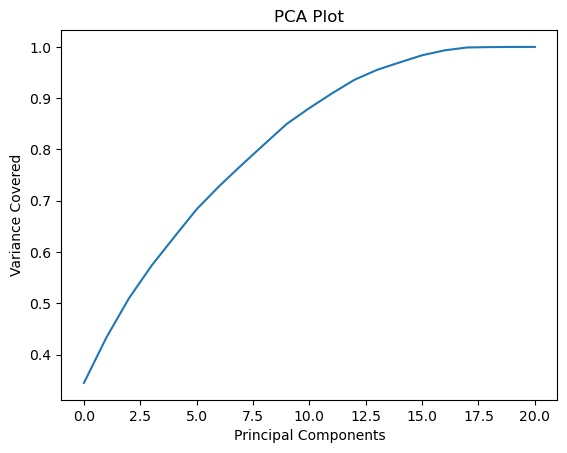

In [115]:
# Lets plot the PCA plot to select the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA Plot")
plt.show()

From the graph we can see around 19 principal components are able to explain greater than 95% variance. So its safe to consider the 19 pca.

In [117]:
pca=PCA(n_components=19)
pca_x=pca.fit_transform(X_scaled)
pca_x=pd.DataFrame(pca_x, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                   'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PCA18','PCA19'])
pca_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PCA18,PCA19
0,0.018268,1.922600,-0.160400,-0.784471,-2.274116,2.555566,-0.226704,1.718094,-0.685506,-0.522089,0.005900,0.822269,0.257545,-0.478958,0.606738,0.316616,-0.421935,-0.191935,0.017047
1,-2.154586,0.262051,0.221574,-0.614742,-3.335168,-0.248173,1.077564,-1.419826,0.028060,-0.002447,0.215029,-0.217310,0.238908,-0.486946,-0.794371,0.519942,-0.175711,-0.041250,-0.098967
2,-2.845185,0.051474,-0.721920,-0.296399,-2.152543,0.588869,1.220105,-1.421252,-0.462092,0.156588,0.489378,-0.403891,-0.130843,-0.404259,-0.688387,0.467240,-0.202957,-0.016274,0.046138
3,-1.900310,-0.493079,0.617507,-0.428862,-2.930292,-0.306580,0.905109,-1.660990,-0.031401,0.258074,0.869532,-0.144061,0.228571,-0.082228,-0.545000,0.111208,0.198632,-0.280208,-0.124562
4,-2.563716,-0.712692,-0.288104,-0.159140,-2.063432,0.634692,1.210113,-1.436980,-0.537868,0.235625,1.167100,-0.269857,-0.099269,-0.028608,-0.439318,0.046165,0.162230,-0.257673,0.023094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26167,-1.605467,-2.484884,-0.238042,1.862553,1.080566,-0.364587,-0.931172,-0.559868,0.511803,-1.832234,-0.181622,-0.054293,0.467375,0.404186,0.526610,0.481811,-0.199983,0.254616,0.037390
26168,3.471169,0.067323,-2.303376,-0.859774,0.380147,-1.609154,2.462564,1.005607,0.560693,-0.420385,0.222533,-0.618925,-0.139009,-0.225985,-0.168065,0.459922,0.104642,-0.098840,0.005455
26169,-1.183870,-0.165594,-1.747512,1.407606,0.211677,-0.472351,-0.499250,0.207262,0.757852,-2.202630,0.728927,-0.058686,0.298428,-0.079066,0.598051,0.237896,-0.081432,0.352409,0.045312
26170,-0.658888,-1.486160,0.537160,0.021728,0.559558,-1.040719,-0.017828,1.982129,1.160706,-0.532613,-0.423292,0.076508,-0.324027,0.249660,-0.198037,0.020402,0.209700,-0.168302,-0.021515


## Model Selection and Building

In [118]:
# We will use LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mean_squared_error
acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3, random_state=i)
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train)
    r1 = r2_score(y_train,y_pred) # accuracy check on train data
    
    pred = lr.predict(x_test)
    r2=r2_score(y_test, pred) # accuracy check on test data
    
    if r2 > acc_score_test and r1 > acc_score_train:
        # selecting  max score accuracy
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.9364909162461748
at random sate 1, the testing accuracy is:- 0.9393825708210011


at random sate 2, the training accuracy is:- 0.9364909162461748
at random sate 2, the testing accuracy is:- 0.9393825708210011


at random sate 3, the training accuracy is:- 0.9364909162461748
at random sate 3, the testing accuracy is:- 0.9393825708210011


at random sate 4, the training accuracy is:- 0.9364909162461748
at random sate 4, the testing accuracy is:- 0.9393825708210011


at random sate 5, the training accuracy is:- 0.9364909162461748
at random sate 5, the testing accuracy is:- 0.9393825708210011


at random sate 6, the training accuracy is:- 0.9364909162461748
at random sate 6, the testing accuracy is:- 0.9393825708210011


at random sate 7, the training accuracy is:- 0.9364909162461748
at random sate 7, the testing accuracy is:- 0.9393825708210011


at random sate 8, the training accuracy is:- 0.9364909162461748
at random sate 8, the testing acc

In [119]:
rand_state

1

In [120]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.3,random_state= rand_state )

In [121]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18320, 19)
(7852, 19)
(18320,)
(7852,)


In [122]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
ada = AdaBoostRegressor()
gb=GradientBoostingRegressor()

from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor()

import xgboost as xgb
xgb=xgb.XGBRegressor()

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

from sklearn.model_selection import cross_val_score

models=[]
models.append(('LinearRegression', LR))
models.append(('DecisionTreeRegressor', dt))
models.append(('AdaBoostRegressor', ada))
models.append(('GradientBoostingRegressor', gb))
models.append(('RandomForestRegressor', rfc))
models.append(('XGBRegressor', xgb))
models.append(('KNeighborsRegressor', knn))

ModuleNotFoundError: No module named 'xgboost'